# Style Transfer

In [2]:
import numpy as np
np.random.seed(222)
import tensorflow as tf
tf.random.set_seed(222)
from matplotlib import pyplot as plt
%matplotlib inline
import skimage.io as io
import skimage.transform as T
from skimage.color import gray2rgb

In [3]:
from src.transfer_style import Stylizer
from src.optimizers import GradientDescent, Adam, L_BFGS
from src.callback import Callback

In [4]:
ITERATIONS = 30
resize_dim = (256, 256) # resize to save memory for small GPUs
center_crop = (256, 256)  # crop the middle of the image AFTER resizing (changes input/output image size)

## Input image

Note that this works better with larger images (e.g. 1024px) since the model gets more information. Will perform poorly with images smaller than 256px.

(256, 256, 3)


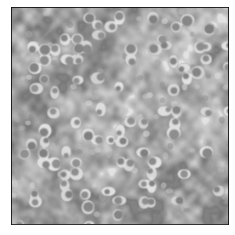

In [5]:
#content = io.imread('img/content/tubingen.jpg')

# TEM GRANULI
content = io.imread('D:\\DATA\\MIDAS\\procedural_synthetic_TEM_granuli_images\\256px_1024images_prep4nnUnet\\training\\input\\image_1.png')
content = io.imread('D:\\CBMED-GITHUB\\MIDAS_dev\\TEM_synthetic_procedural\\.output\\demo_1024px\\images\\image_3.png')
content = gray2rgb(content)

# synthetic islet
#content = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\img3_real.png')
# content = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\img3_real.png_inference_GEN.png')

content = T.resize(content, resize_dim, preserve_range=True).astype('uint8')
content = content[(resize_dim[0]-center_crop[0])//2:(resize_dim[0]-center_crop[0])//2+center_crop[0],
                  (resize_dim[1]-center_crop[1])//2:(resize_dim[1]-center_crop[1])//2+center_crop[1],
                 :]
print(content.shape)
ax = plt.imshow(content)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Original reference image

(256, 256, 3)


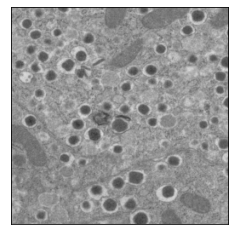

In [6]:
# style = io.imread('img/styles/the-starry-night.jpg')

# TEM granuli
style = io.imread('D:\\DATA\\MIDAS\\procedural_synthetic_TEM_granuli_images\\real_images_256\\image115_7B_insel01_trial02_2500x0014.tif_002.png_1.png')
style = io.imread('D:\\CBMED-GITHUB\\MIDAS_dev\\TEM_synthetic_procedural\\.input\\reference_real_TEM\\image126_7B_insel02_trial03_2500x0000.tif_003.png')
style = gray2rgb(style)

# islets
# style = io.imread('D:\\DATA\\MIDAS\\artistic_style_transfer\\islets\\2021_1186 4085-0228P S99_Scan1_fused.tif_job10522GORDIOS IsletViewer 4085-0228_08092021_c2g.tif_isletID_5_RAWRGB.png')

style = T.resize(style, resize_dim, preserve_range=True).astype('uint8')
style = style[(resize_dim[0]-center_crop[0])//2:(resize_dim[0]-center_crop[0])//2+center_crop[0],
              (resize_dim[1]-center_crop[1])//2:(resize_dim[1]-center_crop[1])//2+center_crop[1],
              :]
print(style.shape)
ax = plt.imshow(style)
ax.axes.xaxis.set_major_locator(plt.NullLocator())
ax.axes.yaxis.set_major_locator(plt.NullLocator())

## Style transfer

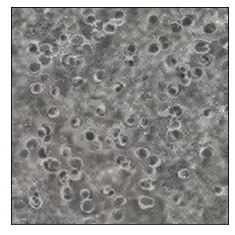

100%|██████████| 30/30 [01:35<00:00,  3.17s/it]


In [7]:
output = Stylizer(content_weight=1, style_weight=1e2)(  # original style_weight=1e4 alters the structure too much
    content=content,
    style=style,
    optimize=L_BFGS(max_evaluations=20),
    iterations=ITERATIONS,
    callback=Callback('build/style-transfer/realTEM')
)
io.imsave('img/style-transfer/realTEM.jpg', output)